In [ ]:
#import libraries
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load the datasets with the correct filenames
german_df = pd.read_csv('german.csv')
ligue1_df = pd.read_csv('ligue1.csv')
epl_df = pd.read_csv('epl.csv')
seriaA_df = pd.read_csv('seriaA.csv')
laliga_df = pd.read_csv('laliga.csv')


In [ ]:
# Print column names for each DataFrame
print("German columns:", german_df.columns)
print("Ligue 1 columns:", ligue1_df.columns)
print("EPL columns:", epl_df.columns)
print("Serie A columns:", seriaA_df.columns)
print("La Liga columns:", laliga_df.columns)


German columns: Index(['Rank', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Season', 'Squad_encoded', 'League'],
      dtype='object')
Ligue 1 columns: Index(['Rank', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Season', 'Squad_encoded', 'League'],
      dtype='object')
EPL columns: Index(['Rank', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Season', 'Squad_encoded', 'League'],
      dtype='object')
Serie A columns: Index(['Rank', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Season', 'Squad_encoded', 'League'],
      dtype='object')
La Liga columns: Index(['Rank', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Season',
       'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Squad_encoded', 'League'],
      dtype='object')


In [ ]:
# Combine all datasets into one DataFrame
all_df = pd.concat([german_df, ligue1_df, epl_df, seriaA_df, laliga_df], ignore_index=True)

# Check for missing values in the combined dataset
print("Missing Data Summary")
print(all_df.isnull().sum())


Missing Data Summary
Rank             0
Squad            0
MP               0
W                0
D                0
L                0
GF               0
GA               0
GD               0
Pts              0
Pts/MP           0
xG               0
xGA              0
xGD              0
xGD/90           0
Season           0
Squad_encoded    0
League           0
dtype: int64


In [ ]:

# Convert the 'Season' column to string type first
all_df['Season'] = all_df['Season'].astype(str).str[:4].astype('int64')


In [ ]:
# Combine all datasets into one DataFrame
all_df = pd.concat([german_df, ligue1_df, epl_df, seriaA_df, laliga_df], ignore_index=True)

# Function to create a 'Top4' column indicating if the squad finished in the top 4
def create_top4_target(df):
    df_sorted = df.sort_values(by=['Pts'], ascending=False)
    top_4_squads = df_sorted.head(4)['Squad']
    df['Top4'] = df['Squad'].apply(lambda squad: 1 if squad in top_4_squads.values else 0)
    return df

# Apply the function to the combined DataFrame 'all_df'
all_df = create_top4_target(all_df)

In [ ]:
# Define the feature columns and target column
features = ['W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP','xG', 'Squad_encoded']
target = 'Top4'

# Separate features and target variable
X = all_df[features]
y = all_df[target]


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
#import libraries
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the scaler
scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to handle class imbalance in the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define models and hyperparameter grids
svm_model = SVC()
bagging_model = BaggingClassifier()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# Hyperparameter grids for Grid Search and Randomized Search
svm_param_grid = {
    'C': [0.1, 1, 10, 100],  # Penalty parameter
    'kernel': ['linear', 'rbf']  # Kernel type
}

bagging_param_grid = {
    'n_estimators': [10, 50, 100]  # Number of base estimators
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
}

gb_param_dist = {
    'n_estimators': np.arange(50, 201, 10),  # Range of n_estimators
    'learning_rate': [0.01, 0.1, 0.2, 0.3]  # Learning rates
}

# Grid Search for SVM
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_resampled, y_resampled)
best_svm_model = svm_grid_search.best_estimator_
print("Best SVM Hyperparameters:", svm_grid_search.best_params_)

# Grid Search for Bagging Classifier
bagging_grid_search = GridSearchCV(bagging_model, bagging_param_grid, cv=5, scoring='accuracy')
bagging_grid_search.fit(X_resampled, y_resampled)
best_bagging_model = bagging_grid_search.best_estimator_
print("Best Bagging Hyperparameters:", bagging_grid_search.best_params_)

# Grid Search for Random Forest Classifier
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_resampled, y_resampled)
best_rf_model = rf_grid_search.best_estimator_
print("Best Random Forest Hyperparameters:", rf_grid_search.best_params_)

# Randomized Search for Gradient Boosting
gb_random_search = RandomizedSearchCV(gb_model, gb_param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
gb_random_search.fit(X_resampled, y_resampled)
best_gb_model = gb_random_search.best_estimator_
print("Best Gradient Boosting Hyperparameters:", gb_random_search.best_params_)


Best SVM Hyperparameters: {'C': 100, 'kernel': 'rbf'}
Best Bagging Hyperparameters: {'n_estimators': 50}
Best Random Forest Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Gradient Boosting Hyperparameters: {'n_estimators': 90, 'learning_rate': 0.2}


SVM Accuracy: 0.9628482972136223
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       315
           1       0.33      0.50      0.40         8

    accuracy                           0.96       323
   macro avg       0.66      0.74      0.69       323
weighted avg       0.97      0.96      0.97       323

Bagging Accuracy: 0.9628482972136223
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       315
           1       0.38      0.75      0.50         8

    accuracy                           0.96       323
   macro avg       0.68      0.86      0.74       323
weighted avg       0.98      0.96      0.97       323

Random Forest Accuracy after SMOTE: 0.9721362229102167
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       315
           1       0.46      0.75      0

<ipython-input-197-08787f8f39b3>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


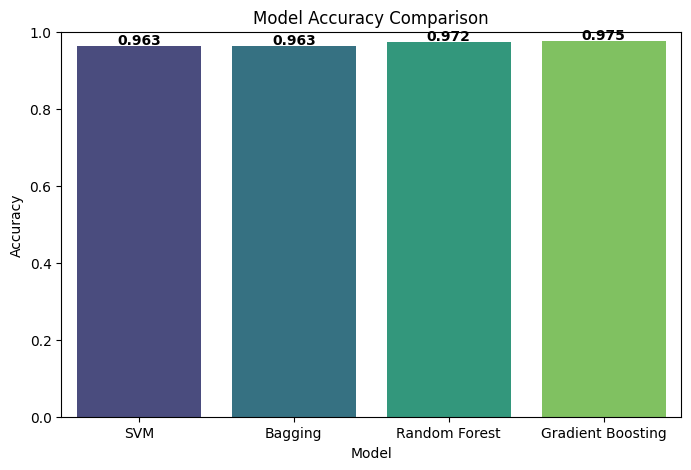

In [ ]:
# Retrain models with the best hyperparameters
# SVM
best_svm_model.fit(X_resampled, y_resampled)
y_pred_svm = best_svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Bagging Classifier
best_bagging_model.fit(X_resampled, y_resampled)
y_pred_bagging = best_bagging_model.predict(X_test_scaled)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Accuracy:", accuracy_bagging)
print("Classification Report:\n", classification_report(y_test, y_pred_bagging))

# Retrain for Random Forest with best hyperparameters
best_rf_model.fit(X_resampled, y_resampled)
y_pred_rf = best_rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy after SMOTE:", accuracy_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Retrain for Gradient Boosting
best_gb_model.fit(X_resampled, y_resampled)
y_pred_gb = best_gb_model.predict(X_test_scaled)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

# Compare model accuracies
model_names = ['SVM', 'Bagging', 'Random Forest', 'Gradient Boosting']
accuracies = [accuracy_svm, accuracy_bagging, accuracy_rf, accuracy_gb]

# Plot accuracy comparison
def plot_accuracy_comparison(model_names, accuracies):
    plt.figure(figsize=(8, 5))  # Adjust size as needed
    sns.barplot(x=model_names, y=accuracies, palette='viridis')
    plt.ylim(0, 1)
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Model')

    # Display accuracy values on the bars
    for i, v in enumerate(accuracies):
        plt.text(i, v + 0.005, f"{v:.3f}", ha='center', fontweight='bold')  # Display with 3 decimal points

    plt.show()

# Compare model accuracies
model_names = ['SVM', 'Bagging', 'Random Forest', 'Gradient Boosting']
accuracies = [accuracy_svm, accuracy_bagging, accuracy_rf, accuracy_gb]

plot_accuracy_comparison(model_names, accuracies)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Top 4 Team Prediction for the upcoming season in Europe's major leagues:

Bundesliga:
        Squad  Pts
Bayern Munich   79
     Dortmund   66
   RB Leipzig   63
   Leverkusen   59

Laliga:
          Squad  Pts
      Barcelona   86
    Real Madrid   85
Atletico Madrid   77
        Sevilla   62

Ligue one:
    Squad  Pts
Paris S-G   85
   Monaco   67
     Lyon   65
     Lens   64

Premier League:
          Squad  Pts
Manchester City   91
        Arsenal   89
      Liverpool   82
    Aston Villa   68

Seria A:
   Squad  Pts
Juventus   83
   Inter   77
  Napoli   72
    Roma   70


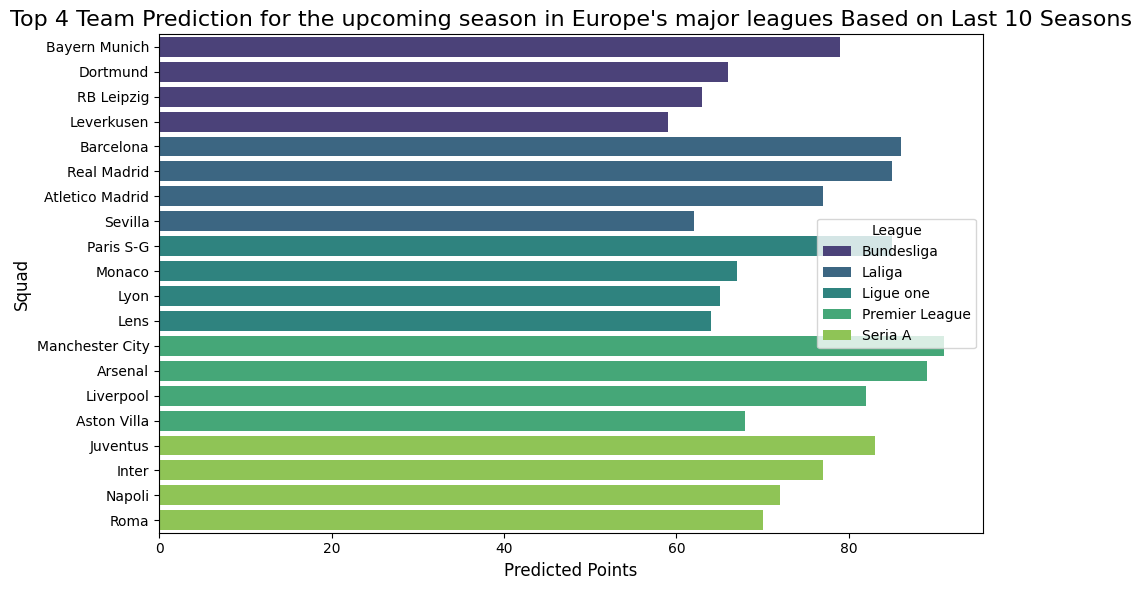

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier  # Ensure you have the model imported if needed

# Assume the combined dataset 'all_df' and the trained 'gb_model' are already loaded
# Also assume X_train and y_train are defined somewhere in your code

# Step 1: Filter the Dataset for the Last 10 Seasons
recent_seasons = sorted(all_df['Season'].unique())[-10:]  # Get the last 10 unique seasons
last_10_seasons_df = all_df[all_df['Season'].isin(recent_seasons)]  # Filter data for these 10 seasons

# Step 2: Aggregate Performance Metrics by Squad and League Across the Last 10 Seasons
aggregated_df = last_10_seasons_df.groupby(['Squad', 'League']).agg({
    'W': 'mean',
    'D': 'mean',
    'L': 'mean',
    'GF': 'mean',
    'GA': 'mean',
    'GD': 'mean',
    'Pts': 'mean',
    'Pts/MP': 'mean',
    'xG': 'mean',
    'Squad_encoded': 'first'
}).reset_index()

# Step 3: Define the Features for Prediction
features = ['W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'Squad_encoded']

# Extract the features from the aggregated DataFrame
X_last_10_seasons = aggregated_df[features]

# Convert to NumPy array for prediction
X_last_10_seasons_array = X_last_10_seasons.to_numpy()

# Step 4: Ensure the Gradient Boosting Model is Fitted
# If gb_model is not fitted yet, fit it now
if not hasattr(gb_model, "estimators_"):  # Check if the model is already fitted
    gb_model.fit(X_train, y_train)  # Fit the model with training data

# Step 5: Predict Top 4 for Each Team Based on Past Performance Using the Trained Gradient Boosting Model
aggregated_df['Top4_Prediction'] = gb_model.predict(X_last_10_seasons_array)  # Use Gradient Boosting model here

# Step 6: Sort and Select the Top 4 Teams from Each League
# Sort teams by League and Points (or other relevant metric)
aggregated_df = aggregated_df.sort_values(by=['League', 'Pts'], ascending=[True, False])
# Round the points to whole numbers
aggregated_df['Pts'] = aggregated_df['Pts'].round().astype(int)

# For each league, select the top 4 teams
top4_predictions_by_league = aggregated_df.groupby('League').head(4)

# Step 7: Display the Predicted Top 4 Teams for Each League
print("Top 4 Team Prediction for the upcoming season in Europe's major leagues:")
for league in top4_predictions_by_league['League'].unique():
    print(f"\n{league}:")
    print(top4_predictions_by_league[top4_predictions_by_league['League'] == league][['Squad', 'Pts']].to_string(index=False))

# Step 8: Visualize the results using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Pts', y='Squad', hue='League', data=top4_predictions_by_league, palette='viridis')

# Add titles and labels
plt.title('Top 4 Team Prediction for the upcoming season in Europe\'s major leagues Based on Last 10 Seasons', fontsize=16)
plt.xlabel('Predicted Points', fontsize=12)
plt.ylabel('Squad', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
